In [1]:
import numpy as np
import pandas as pd
import scipy

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as  sns

for i in [pd, np, scipy, mpl, sns]:
    print(i.__name__, i.__version__)

pandas 0.25.1
numpy 1.18.5
scipy 1.5.2
matplotlib 3.5.3
seaborn 0.12.2


# 2-5-1 가설 검정 - 모분산

In [2]:
from scipy.stats import chi2, f, expon, norm

## 1. 단일 모집단 분산 검정

모분산($\sigma^2$)에 대한 검정입니다.

$H_0: \sigma^2 = \sigma^2_0$

$H_1:$

|대립 가설|검정 종류|
|---|---|
|$$H_1: \sigma^2 < \sigma^2_0$$|좌측 꼬리(left)|
|$$H_1: \sigma^2 > \sigma^2_0$$|우측 꼬리(right)|
|$$H_1: \sigma^2 \ne \sigma^2_0$$|양쪽 꼬리(two-sided)|


모분산과 표본분산이 아래와 같은 성질이 있음을 이용합니다.

$(n-1)\frac{S^2}{\sigma^2} \sim \chi^2_{n-1}$, $n$은 표본수입니다.

**가정**

모집단은 정규 분포를 따릅니다.

표본은 서로 독립입니다.

$H_0: \frac{\sigma^2}{\sigma^2_0} = 1$

|대립 가설|검정 종류|
|---|---|
|$$H_1: \frac{\sigma^2}{\sigma^2_0} < 1$$|좌측 꼬리(left)|
|$$H_1: \frac{\sigma^2}{\sigma^2_0} > 1$$|우측 꼬리(right)|
|$$H_1: \frac{\sigma^2}{\sigma^2_0} \ne 1$$|양쪽 꼬리(two-sided)|

    ※ 카이제곱분포는 비대칭 분포입니다.
       따라서 양측 검정할 때에 pvalue는 어림수(좌측과 우측 확률 중 작은(0.5 이하)×2)가 됩니다.

**증거의 확률 분포 및 통계량**

$H_0$ 가 맞다면, 

> $\frac{\sigma^2}{\sigma^2_0} = 1$

확률 분포와 검정 통계량

> $X^2=(n-1)\frac{S^2}{\sigma_0^2} \sim \chi^2(n-1)$


**[Ex.1]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

레이저를 이용한 거리 측정기를 개발 중에 있습니다. 

기존에 거리 측정기의 품질 합격 기준은 100m 거리를 재었을 때, 

유의 수준 5%로 거리의 표준편차가 0.25m 이내여야 통과가 됩니다. 
  
모의로 100m에서 거리를 측정 했을 때의 실험 결과가 아래와 같습니다. 

100m 지점에서 측정된 거리는 정규 분포를 따른 다고 가정합니다. 이 때, 통과 여부를 판단해 봅니다.

```
99.674, 100.299, 100.085, 99.548, 99.826, 100.495, 99.272, 99.871, 100.380, 99.740, 
99.796, 99.972, 100.447, 99.808, 99.867, 99.870, 100.662, 100.656, 100.301, 100.116, 
100.221, 100.447, 99.719, 100.353, 99.624, 99.809, 100.272, 99.571, 99.958, 99.741
```
    
</div>

$H_0: \sigma = 0.25$

$H_1: \sigma < 0.25$
    
$X^2=(n-1)\frac{S^2}{0.25^2} \sim \chi^2(n-1)$

**좌측 검정** 입니다.

In [3]:
X = [
    99.674, 100.299, 100.085, 99.548, 99.826, 100.495, 99.272, 99.871, 100.380, 99.740, 
    99.796, 99.972, 100.447, 99.808, 99.867, 99.870, 100.662, 100.656, 100.301, 100.116, 
    100.221, 100.447, 99.719, 100.353, 99.624, 99.809, 100.272, 99.571, 99.958, 99.741
]
S_sq = np.var(X, ddof=1)
n = len(X)
Chi2 = (n - 1) * S_sq / (0.25 ** 2)
print("검정통계량(Chi2): {}, pvalue: {}".format(Chi2, chi2.cdf(Chi2, df= n -1)))

검정통계량(Chi2): 58.864714666667, pvalue: 0.9991467927097515


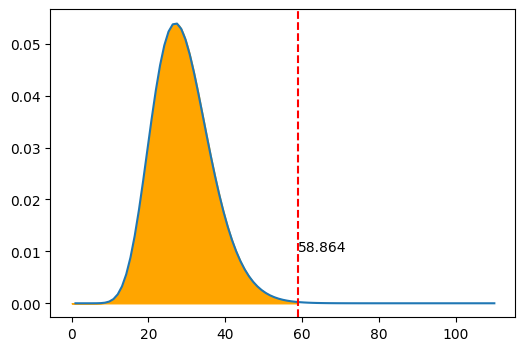

In [4]:
plt.figure(figsize=(6, 4))
plt.plot(np.linspace(1, 110, 100), chi2.pdf(np.linspace(1, 110, 100), df=n-1))
plt.axvline(Chi2, color='red', linestyle='--')
plt.text(Chi2, 0.01, str(Chi2)[:6])

plt.fill_between(np.linspace(0, Chi2, 100), np.zeros(shape=100),
                chi2.pdf(np.linspace(0, Chi2, 100), df=n-1), color='orange')
plt.show()

## 두 개의 모집단의 분산 검정

두 개의 모집단의 분산($\sigma^2_1$), 분산($\sigma^2_2$)에 대한 검정입니다.

$H_0: \sigma^2_1 = \sigma^2_2$

$H_1:$

|대립 가설|검정 종류|
|---|---|
|$$H_1: \sigma^2_1 < \sigma^2_2$$|좌측 꼬리(left)|
|$$H_1: \sigma^2_1 > \sigma^2_2$$|우측 꼬리(right)|
|$$H_1: \sigma^2_1 \ne \sigma^2_2$$|양쪽 꼬리(two-sided)|

### F 검정 (F-test)

**가정**

두 개의 모집단은 정규 분포를 따릅니다.

각 표본들은 서로 독립입니다.


$H_0: \frac{\sigma^2_1}{\sigma^2_2} = 1$

$H_1:$

|대립 가설|검정 종류|
|---|---|
|$$H_1: \frac{\sigma^2_1}{\sigma^2_2} < 1$$|좌측 꼬리(left)|
|$$H_1: \frac{\sigma^2_1}{\sigma^2_2} > 1$$|우측 꼬리(right)|
|$$H_1: \sigma^2_1 \ne \sigma^2_2$$|양쪽 꼬리(two-sided)|

    ※ F분포는 비대칭 분포입니다.
       따라서 양측 검정할 때에 pvalue는 어림수(좌측과 우측 확률 중 작은(0.5 이하)×2)가 됩니다.

**증거의 확률 분포 및 통계량**

$H_0$ 가 맞다면, 

> $\frac{\sigma^2_1}{\sigma^2_2} = 1$가 됩니다.

확률 분포와 검정 통계량

> $F=\frac{S_1^2}{S_2^2} \sim F(n_1-1, n_2-1)$, n: 표본수

**유도 과정**

$(n_1-1)\frac{S_1^2}{\sigma_1^2} \sim \chi^2(n_1-1)$

$(n_2-1)\frac{S_2^2}{\sigma_2^2} \sim \chi^2(n_2-1)$

$\frac{\frac{S_1^2}{\sigma_1^2}}{\frac{S_2^2}{\sigma_2^2}} \sim \frac{\chi^2(n_1-1)/(n_1-1)}{\chi^2(n_2-1)/(n_2-1)}$

$\frac{S_1^2}{S_2^2} \sim F(n_1-1, n_2-1)$


**[Ex.2]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

신형 거리 계산기를 개발 중에 있습니다. 

기존에 거리 계산기 보다 거리를 재었을 때보다 분산이 낮게 만드는 것을 목표로 하고 있습니다.

신형 거리 계산기의 개발의 성공 기준은 100m 거리를 재었을 때를 기준으로 합니다.

100m에서 거리를 측정 했을 때의 실험 결과가 아래와 같습니다. 

유의 수준을 5%로 했을 때 기존 거리 계산기 보다 분산이 낮다고 판단할 수 있는지 확인합니다.

기존 거리 계산기 기록
```
99.674, 100.299, 100.085, 99.548, 99.826, 100.495, 99.272, 99.871, 100.380, 99.740, 
99.796, 99.972, 100.447, 99.808, 99.867, 99.870, 100.662, 100.656, 100.301, 100.116, 
100.221, 100.447, 99.719, 100.353, 99.624, 99.809, 100.272, 99.571, 99.958, 99.741
```

신형 거리 계산기 기록

```
99.696, 100.279, 100.079, 99.578, 99.838, 100.462, 99.321, 99.880, 100.354, 99.757, 
99.810, 99.973, 100.418, 99.821, 99.876, 99.878, 100.618, 100.612, 100.281, 100.108, 
100.206, 100.417, 99.738, 100.329, 99.649, 99.821, 100.254, 99.600, 99.961, 99.759, 
99.928, 99.216, 99.504, 99.804, 100.260
```
    
</div>

$H_0: \frac{\sigma^2_1}{\sigma^2_2} = 1$

$H_1: \frac{\sigma^2_1}{\sigma^2_2} > 1$
    
$F=\frac{S_1^2}{S_2^2} \sim F(n_1-1, n_2-1)$

**우측 검정** 입니다.

In [5]:
X1 = [
    99.674, 100.299, 100.085, 99.548, 99.826, 100.495, 99.272, 99.871, 100.380, 99.740, 
    99.796, 99.972, 100.447, 99.808, 99.867, 99.870, 100.662, 100.656, 100.301, 100.116, 
    100.221, 100.447, 99.719, 100.353, 99.624, 99.809, 100.272, 99.571, 99.958, 99.741
]

X2 = [
    99.696, 100.279, 100.079, 99.578, 99.838, 100.462, 99.321, 99.880, 100.354, 99.757, 
    99.810, 99.973, 100.418, 99.821, 99.876, 99.878, 100.618, 100.612, 100.281, 100.108, 
    100.206, 100.417, 99.738, 100.329, 99.649, 99.821, 100.254, 99.600, 99.961, 99.759, 
    99.928, 99.216, 99.504, 99.804, 100.260
]

S1_sq = np.var(X1, ddof=1)
S2_sq = np.var(X2, ddof=1)

n1 = len(X1)
n2 = len(X2)

F = S1_sq / S2_sq
print("검정통계량(F): {}, pvalue: {}".format(F, f.sf(F, n1 - 1, n2 - 1)))

검정통계량(F): 1.0379777993154704, pvalue: 0.45501804967354664


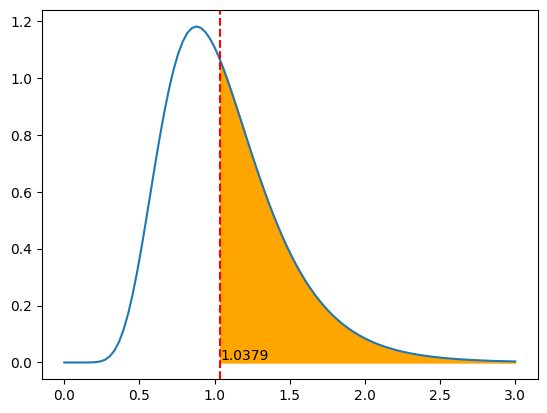

In [6]:
plt.plot(np.linspace(0, 3, 100), f.pdf(np.linspace(0, 3, 100), n1 - 1, n2 - 1))
plt.axvline(F, color='red', linestyle='--')
plt.text(F, 0.01, str(F)[:6])

plt.fill_between(np.linspace(F, 3, 100), np.zeros(shape=100),
                f.pdf(np.linspace(F, 3, 100), n1-1, n2-1), color='orange')
plt.show()

## 2. 다수의 모집단의 등분산 검정

$H_0: \sigma^2_0 = \sigma^2_1 = ... = \sigma^2_{k}$

$H_1$: 모집단 간 분산에 차이가 존재합니다.

### Bartlett 검정

**가정**

모집단들은 정규분포를 따릅니다.

**증거의 확률 분포 및 통계량**

$H_0$가 맞다면,

아래 B는 근사적으로 카이제곱분포를 따릅니다. 

우측 검정입니다.

$B = \frac{(N - k) \ln(S_p^2) - \sum_{i=1}^k(n_i - 1)ln(S_i^2)}{1 + \frac{1}{3(k-1)} \left(\sum_{i=1}^{k}\left(\frac{1}{n_i-1}\right) - \frac{1}{N-k}\right)} \sim \chi^2(k - 1)$ 

- k: 모집단의 수 
- N: 전체표본의 수
- $S_i^2$: i 모집단의 표본분산, $n_i$: i 모집단의 표본수

$S_p^2$: 통합 분산(Pooled Variance)

$S_p^2 = \frac{\sum_{i=1}^k(n_i - 1)(S_i^2)}{\sum_{i=1}^k(n_i - 1)}$

**[Ex.3]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

다음 거리 계산기 모집단이 등분산인지 조사해보세요. 세 모집단은 모두 정규 분포를 따릅니다.

기존 거리 계산기 기록
```
99.674, 100.299, 100.085, 99.548, 99.826, 100.495, 99.272, 99.871, 100.380, 99.740, 
99.796, 99.972, 100.447, 99.808, 99.867, 99.870, 100.662, 100.656, 100.301, 100.116, 
100.221, 100.447, 99.719, 100.353, 99.624, 99.809, 100.272, 99.571, 99.958, 99.741
```

신형 거리 계산기 기록
```
99.696, 100.279, 100.079, 99.578, 99.838, 100.462, 99.321, 99.880, 100.354, 99.757, 
99.810, 99.973, 100.418, 99.821, 99.876, 99.878, 100.618, 100.612, 100.281, 100.108, 
100.206, 100.417, 99.738, 100.329, 99.649, 99.821, 100.254, 99.600, 99.961, 99.759, 
99.928, 99.216, 99.504, 99.804, 100.260
```

경쟁사 거리 계산기 기록
```
99.653, 100.319, 100.091, 99.518, 99.815, 100.528, 99.223, 99.863, 100.405, 99.723, 
99.783, 99.970, 100.477, 99.796, 99.858, 99.861, 100.706, 100.700, 100.321, 100.124, 
100.236, 100.477, 99.701, 100.376, 99.599
```
</div>

In [7]:
s_A = pd.Series(
    [99.674, 100.299, 100.085, 99.548, 99.826, 100.495, 99.272, 99.871, 100.380, 99.740, 
    99.796, 99.972, 100.447, 99.808, 99.867, 99.870, 100.662, 100.656, 100.301, 100.116, 
    100.221, 100.447, 99.719, 100.353, 99.624, 99.809, 100.272, 99.571, 99.958, 99.741], name='m'
)
s_B = pd.Series(
    [99.696, 100.279, 100.079, 99.578, 99.838, 100.462, 99.321, 99.880, 100.354, 99.757, 
    99.810, 99.973, 100.418, 99.821, 99.876, 99.878, 100.618, 100.612, 100.281, 100.108, 
    100.206, 100.417, 99.738, 100.329, 99.649, 99.821, 100.254, 99.600, 99.961, 99.759, 
    99.928, 99.216, 99.504, 99.804, 100.260], name='m'
)
s_C = pd.Series(
    [99.653, 100.319, 100.091, 99.518, 99.815, 100.528, 99.223, 99.863, 100.405, 99.723, 
    99.783, 99.970, 100.477, 99.796, 99.858, 99.861, 100.706, 100.700, 100.321, 100.124, 
    100.236, 100.477, 99.701, 100.376, 99.599], name='m'
)

df_m = pd.concat(
    [a.to_frame().assign(model=b) for a, b in zip([s_A, s_B, s_C], ['A', 'B', 'C'])]
)
df_m

,m,model
0,99.674,A
1,100.299,A
2,100.085,A
3,99.548,A
4,99.826,A
...,...,...
20,100.236,C
21,100.477,C
22,99.701,C
23,100.376,C


$B = \frac{(N - k) \ln(S_p^2) - \sum_{i=1}^k(n_i - 1)ln(S_i^2)}{1 + \frac{1}{3(k-1)} \left(\sum_{i=1}^{k}\left(\frac{1}{n_i-1}\right) - \frac{1}{N-k}\right)} \sim \chi^2(k - 1)$ 

$S_p^2 = \frac{\sum_{i=1}^k(n_i - 1)(S_i^2)}{\sum_{i=1}^k(n_i - 1)}$

In [8]:
df_sp = df_m.groupby('model')['m'].agg(['var', 'count'])
df_sp

,var,count
model,,
A,0.126864,30
B,0.122222,35
C,0.155286,25


In [9]:
# Pooled Variance를 구합니다.
Sp_sq = (df_sp['var'] * (df_sp['count'] - 1)).sum() / (df_sp['count'] - 1).sum()
k = 3
n = len(df_m)
# B의 분모를 구합니다.
B_num = (n - k) * np.log(Sp_sq) - (np.log(df_sp['var']) * (df_sp['count']- 1)).sum()
# B의 분자를 구합니다.
B_denom = 1 + 1 / (3 * (k - 1)) * ((1 / (df_sp['count'] - 1)).sum() - 1 / (n - k))
B = B_num / B_denom
print("검정통계량(B): {}, pvalue: {}".format(B, chi2.sf(B, k - 1)))

검정통계량(B): 0.4463582365057818, pvalue: 0.7999715469550519


In [10]:
# scipy.stats.bartlett 으로도 구할 수 있습니다.
from scipy.stats import bartlett
bartlett(s_A, s_B, s_C)

BartlettResult(statistic=0.4463582365057818, pvalue=0.7999715469550519)

# 2-5-2 정규성 검정


정규성 검정은 모집단이 정규 분포를 따르는 지를 표본을 통해 확인하는 방법입니다.

정규 분포를 따르는 정도를 비교하기 위해,

표본의 수가 클수록 표본의 평균은 정규 분포에 가까워지는 성질을 이용하여 데이터셋을 만듭니다.

$\lambda=3$인 포아송 분포를 따르는 표본수를 3개로 할 때와 30개로 할 때의 표본의 평균을 각각 100개씩 만듭니다.

In [11]:
# lambda=3인 포아송 분포의 표본을 3개씩 뽑아 평균을 100개 만듭니다.
s_mean_3 = [expon.rvs(scale=1/3, size=3).mean() for _ in range(100)]
# lambda=3인 포아송 분포의 표본을 30개씩 뽑아 평균을 100개 만듭니다.
s_mean_30 = [expon.rvs(scale=1/3, size=30).mean() for _ in range(100)]

### Q-Q Plot

비교할 대상 확률 분포를 정규 분포로하여 Q-Q Plot을 출력하여 판단합니다. 

Q-Q Plot의 모양이 직선에 가까울 수록 두 확률 변수의 분포가 비슷합니다.
  
**Q-Q Plot 그리기**

<div style="border: 0px solid #ddd; padding: 12px; margin-top: 10px">

수열을 정렬합니다.

Y좌표: 수열

X좌표: 

> 1. 수열의 값을 분위수(0~1사이)로 변환하고 (순위 / 표본수)
>
> 2. 백분위수로 변환된 값을 정규 분포의 확률 변수로 변환합니다.(norm.ppf)
  
산포도 그래프로 출력합니다.
    
- X와 Y의 분포가 비슷할 수록 산포도 그래프의 출력 형태는 직선에 가깝게 됩니다.
    
</div>

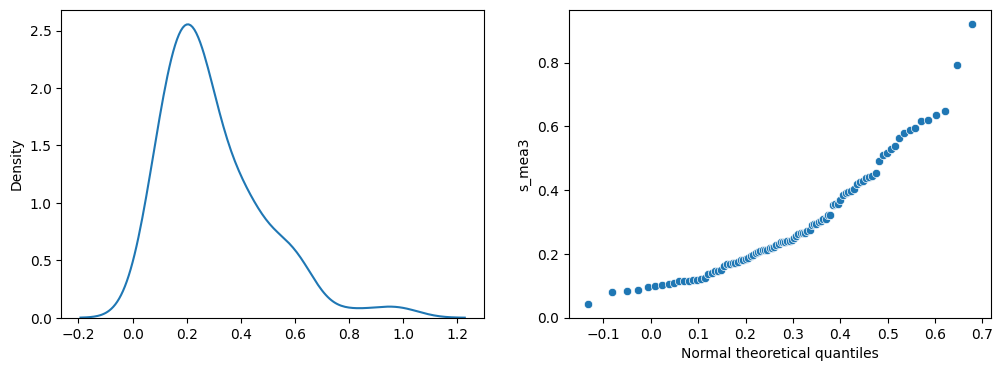

In [12]:
X = np.sort(s_mean_3) # 분위를 구하기 위해 정렬합니다
X_ppf = np.arange(0, 100) / 100 # 표본의 등분위(0~1사이)를 구합니다.
X_norm_ppf = norm.ppf(X_ppf, loc=np.mean(X), scale=np.std(X))

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.kdeplot(X, ax=axes[0])
# 0분위와 1분위의 정규 분포의 확률 변수는 -∞과 ∞ 이므로 생략합니다.
sns.scatterplot(x=X_norm_ppf[1:-1], y=X[1:-1])
plt.gca().set_xlabel('Normal theoretical quantiles')
plt.gca().set_ylabel('s_mea3')
plt.show()

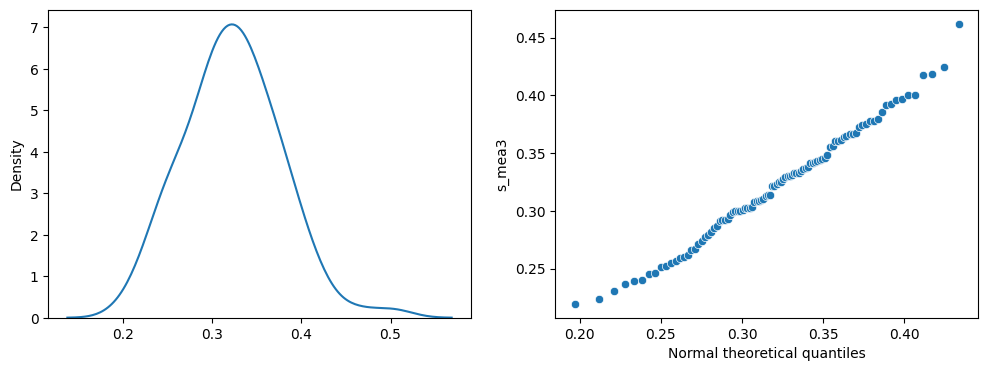

In [13]:
X = np.sort(s_mean_30) # 분위를 구하기 위해 정렬합니다
X_ppf = np.arange(0, 100) / 100 # 표본의 등분위(0~1사이)를 구합니다.
X_norm_ppf = norm.ppf(X_ppf, loc=np.mean(X), scale=np.std(X))

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.kdeplot(X, ax=axes[0])
# 0분위와 1분위의 정규 분포의 확률 변수는 -∞과 ∞ 이므로 생략합니다.
sns.scatterplot(x=X_norm_ppf[1:-1], y=X[1:-1])
plt.gca().set_xlabel('Normal theoretical quantiles')
plt.gca().set_ylabel('s_mea3')
plt.show()

$H_0$: 모집단은 정규 분포를 따릅니다.

$H_1$: 모집단은 정규 분포를 따르지 않습니다.

### Shapiro-Wilks

**증거의 확률 분포 및 통계량**

$W = \frac{\left(\sum_{i=1}^{n} a_i x_{(i)}\right)^2}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$

$x_{(i)}$: i번째로 큰수

$(a_1, ..., a_n) = \frac{m^TV^{-1}}{C}$

$C=||V^{-1}m||=\left(m^TV^{-1}V^{-1}m\right)$

n: 표본수

**m과 V의 정체**

표본의 통계량(평균, 분산)으로 정규 분포에서 n개씩 표본 수집을 여러 번 수행합니다. 

각 수행에서 순위가 1, ... , n까지 수들의 평균이 **m** 입니다.

그리고 순위가 1, ..., n까지의 수들 간에 공분산 행렬이 **V**입니다.


**W**가 따르는 분포는 정의할 수 없습니다. 단지 **W**가 클수록 정규 분포에 가깝습니다.

pvalue와 임계치는 Monte Carlo Simulation을 통해 구해집니다.

중소 규모(보통 2000개 이하)의 표본에 적합합니다.

In [14]:
from scipy.stats import shapiro
shapiro(s_mean_3), shapiro(s_mean_30)

(ShapiroResult(statistic=0.8950689435005188, pvalue=8.349973086296814e-07),
 ShapiroResult(statistic=0.9884182810783386, pvalue=0.5395416021347046))

### Kolmogorov-Smirnof

**증거의 확률 분포 및 통계량**

이론적 누적분포함수와 표본의 누적분포를 비교합니다.

$D_n = sup_x|F_n(x) - F(x)|$

$F_n(x) = \frac{1}{n}\sum_{i=1}^{n}{1_{(-\inf, x]}(X_i)}$, $1_{(-\inf, x]}(X_i)$:는 $X_i$보다 x가 작거나 같으면 1 아니면 0

즉, $F_n(x)$는 표본에서 x보다 작거나 같은 수의 수를 의미합니다.

$D_n$가 클수록 정규 분포와 거리가 먼 것을 의미합니다.

In [15]:
from scipy.stats import kstest
(
    kstest(s_mean_3, norm.cdf, args=[np.mean(s_mean_3), np.std(s_mean_3, ddof=1)]), 
    kstest(s_mean_30, norm.cdf, args=[np.mean(s_mean_30), np.std(s_mean_30, ddof=1)])
)

(KstestResult(statistic=0.14009401876361394, pvalue=0.035633425789146855),
 KstestResult(statistic=0.04511789359251828, pvalue=0.9814730678007878))

### Jaque-Bera

왜도(skewness)와 첨도(kurtosis)를  이용하여 정규성 검정을 합니다. 

검정 통계량은 카이제곱분포에 표본수가 커짐에 따라 점진적으로 수렴합니다.

따라서, 표본수가 적으면(2000개 미만) 정확도가 떨어 집니다.

**증거의 확률 분포 및 통계량**

$JB = \frac{n}{6} \left(\frac{S^2}{6} + \frac{(K-3)^2}{24}\right)$

S: 첨도, K: 왜도

$S = \frac{\sum_{i=1}^{n} (x_i - \bar{x})^3}{n \cdot s^3}$

$K = \frac{\sum_{i=1}^{n} (x_i - \bar{x})^4}{n \cdot s^4}$

In [16]:
from scipy.stats import jarque_bera
jarque_bera(s_mean_3), jarque_bera(s_mean_30)

(Jarque_beraResult(statistic=46.210624370820554, pvalue=9.236134079770864e-11),
 Jarque_beraResult(statistic=2.556457037616095, pvalue=0.27853027482009907))